In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [9]:
df = pd.read_csv('walmart_data.txt')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [10]:
df.shape

(550068, 10)

In [113]:
df.ndim

2

In [114]:
df.size

6050748

In [12]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [115]:
df.dtypes


User_ID                          int64
Product_ID                      object
Gender                          object
Age                             object
Occupation                       int64
City_Category                   object
Stay_In_Current_City_Years      object
Marital_Status                   int64
Product_Category                 int64
Purchase                         int64
Product_Bin                   category
dtype: object

In [119]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


## Outliers 

In [13]:
# for Product_category columns

<Axes: xlabel='Product_Category'>

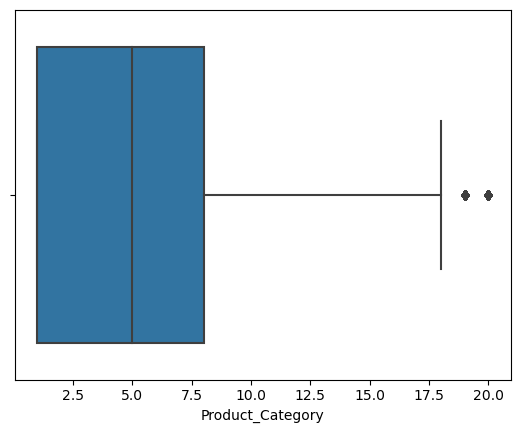

In [14]:
sns.boxplot(data = df, x = 'Product_Category')

In [15]:
Q1 = df['Product_Category'].quantile(0.25)
Q3 = df['Product_Category'].quantile(0.75)

IQR = Q3 - Q1
df[(df['Product_Category'] < (Q1 - 1.5*IQR)) | (df['Product_Category'] > (Q3+1.5*IQR))]['Product_Category'].reset_index()

,index,Product_Category
0,545915,20
1,545916,20
2,545917,20
3,545918,20
4,545919,20
...,...,...
4148,550063,20
4149,550064,20
4150,550065,20
4151,550066,20


## Outlier

In [ ]:
#  for Purchase amount

<Axes: xlabel='Purchase'>

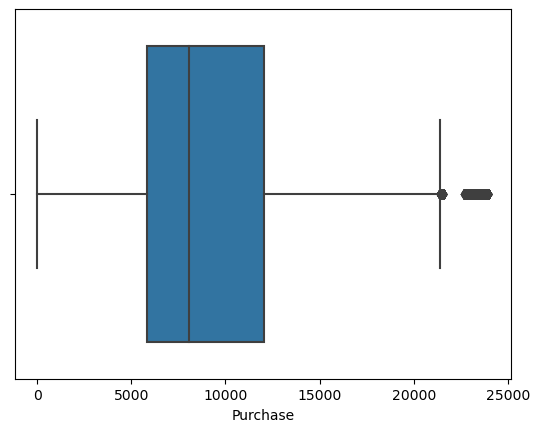

In [16]:
sns.boxplot(data = df, x = 'Purchase')

In [17]:
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)

IQR = Q3 - Q1
df[(df['Purchase'] < (Q1 - 1.5*IQR)) | (df['Purchase'] > (Q3+1.5*IQR))]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,0,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,0,10,23724
544743,1005852,P00202242,F,26-35,1,A,0,1,10,23529
545663,1006002,P00116142,M,51-55,0,C,1,1,10,23663


In [18]:
df['Age'].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

In [19]:
bin = [0,5,10,15,20]
df['Product_Bin'] = pd.cut(df['Product_Category'], bins = bin)

In [20]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Product_Bin
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,"(0, 5]"
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,"(0, 5]"
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,"(10, 15]"
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,"(10, 15]"
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,"(5, 10]"


<Axes: xlabel='Gender', ylabel='Purchase'>

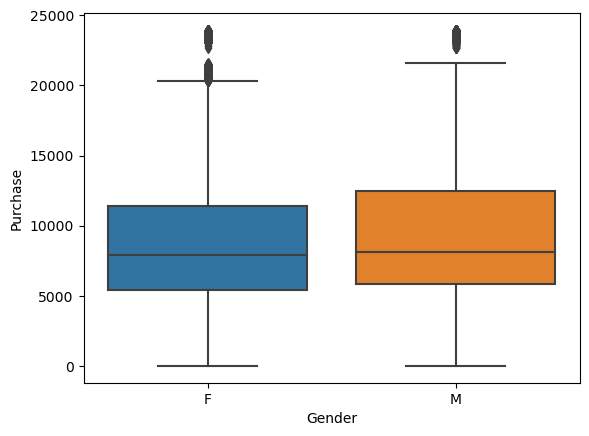

In [21]:
sns.boxplot(data = df, x = 'Gender', y = 'Purchase')

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

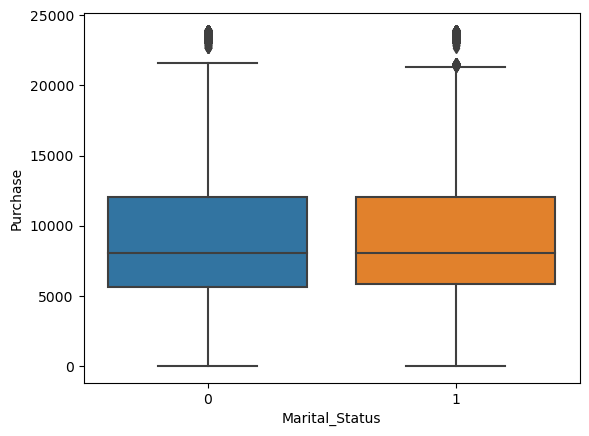

In [22]:
sns.boxplot(data = df, x = 'Marital_Status', y = 'Purchase')

<Axes: xlabel='Age', ylabel='Purchase'>

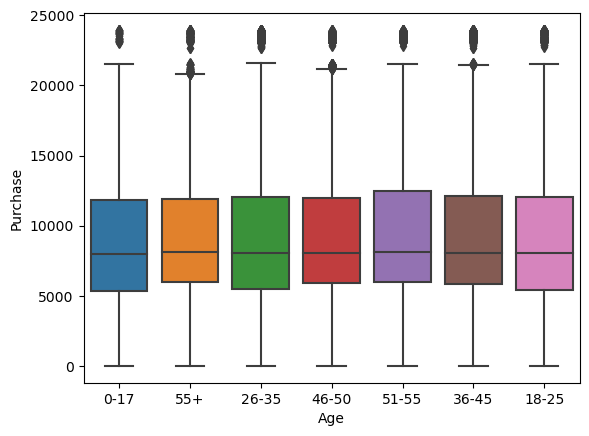

In [23]:
sns.boxplot(data = df, x = 'Age', y = 'Purchase')

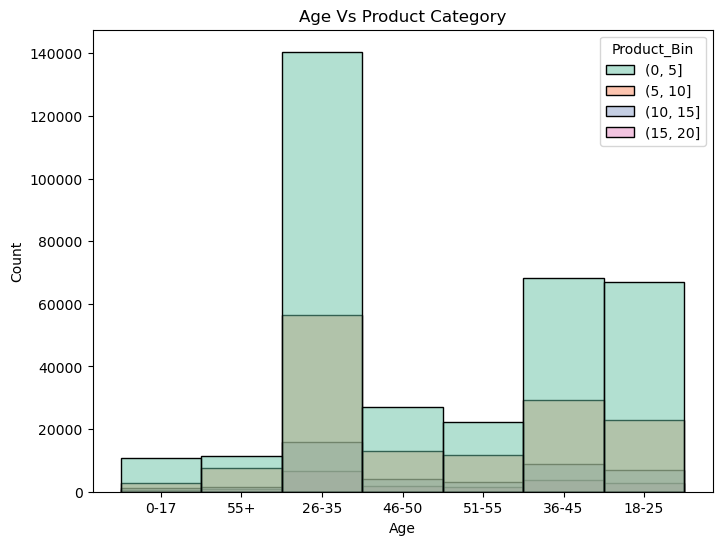

In [24]:
plt.figure(figsize = (8,6))
sns.histplot(data = df, x = 'Age', hue = 'Product_Bin', palette='Set2')
plt.title('Age Vs Product Category')
plt.show()

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

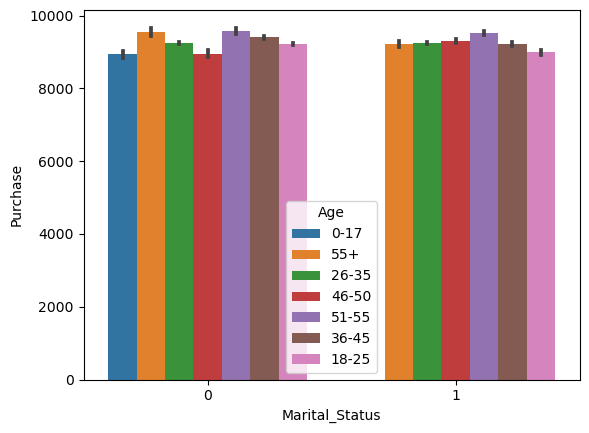

In [25]:
sns.barplot(data = df, x = 'Marital_Status', y = 'Purchase', hue = 'Age')

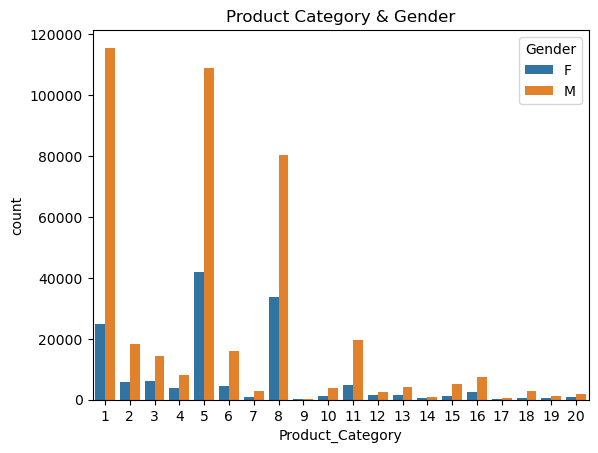

In [26]:
sns.countplot(data = df, x = 'Product_Category', hue = 'Gender')
plt.title('Product Category & Gender')
plt.show()

In [27]:
s = df[df['Gender'] == 'F']
female_mean = s['Purchase'].mean()
female_mean

8734.565765155476

In [28]:
female_std = s['Purchase'].std()
female_std

4767.233289291444

In [29]:
r = df[df['Gender'] == 'M']
male_mean = r['Purchase'].mean()
male_mean

9437.526040472265

In [30]:
male_std = r['Purchase'].std()
male_std

5092.186209777949

- The Average purchase order of Male is greater than female

<Axes: xlabel='Purchase', ylabel='Count'>

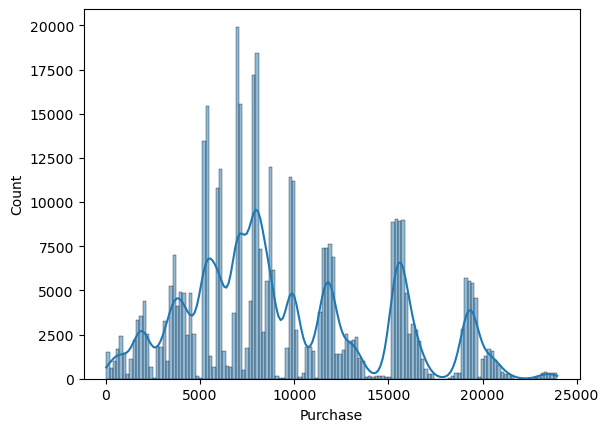

In [31]:
sns.histplot(data = r, x = 'Purchase', kde = True)

In [32]:
norm.ppf(0.025)

-1.9599639845400545

In [33]:
norm.ppf(0.975)

1.959963984540054

In [34]:
lower_range_male = male_mean - 1.95 * male_std
lower_range_male

-492.23706859473714

In [35]:
upper_range_male = male_mean + 1.95 * male_std
upper_range_male

19367.28914953927

<Axes: xlabel='Purchase', ylabel='Count'>

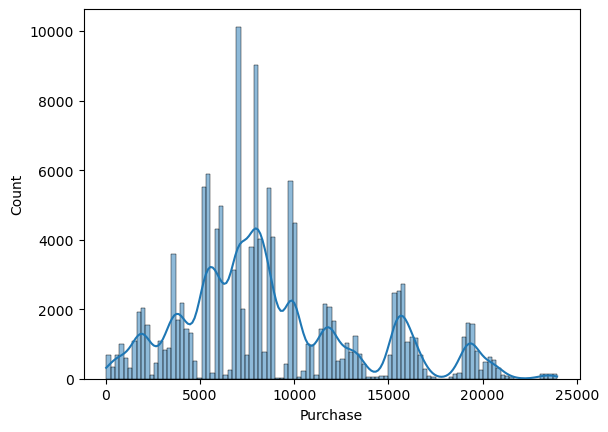

In [36]:
sns.histplot(data = s, x = 'Purchase', kde = True)

In [37]:
lower_range_female = female_mean - 1.95 * female_std
lower_range_female

-561.53914896284

In [38]:
upper_range_female = female_mean + 1.95 * female_std
upper_range_female

18030.67067927379

## Confidence Interval for whole data Purchase and Gender column
### Consider Confidence level at 95%
- The average purchase value between the 95% of the data lies between the range 0 and 19366 for Male
- The average purchase value between the 95% of the data lies between the range 0 and 18031 for Female
- There is difference between the range of the Male and female average purchase value

### Sample size considering 300 for male

In [39]:
sam = [r['Purchase'].sample(300).mean() for i in range (500)]


<Axes: ylabel='Count'>

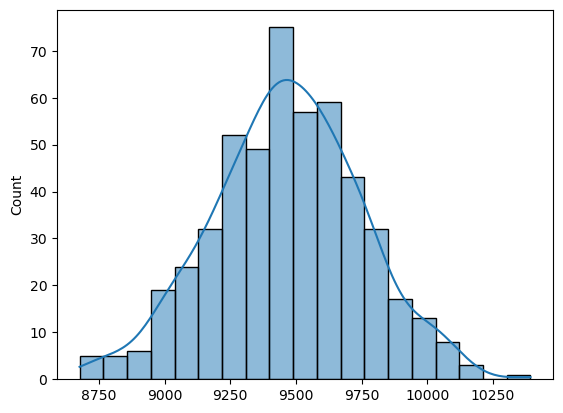

In [40]:
sns.histplot(x = sam, kde = True)

In [41]:
male_mean = np.mean(sam)
male_mean

9465.368779999999

In [42]:
se = male_std/np.sqrt(300)
se

293.9975078978999

In [43]:
lower_range_male = male_mean - 1.95 * se
lower_range_male

8892.073639599093

In [44]:
upper_range_male = male_mean + 1.95 * se
upper_range_male

10038.663920400904

### Sample size considering 300 for female

In [45]:
sam_f = [s['Purchase'].sample(300).mean() for i in range (500)]


<Axes: ylabel='Count'>

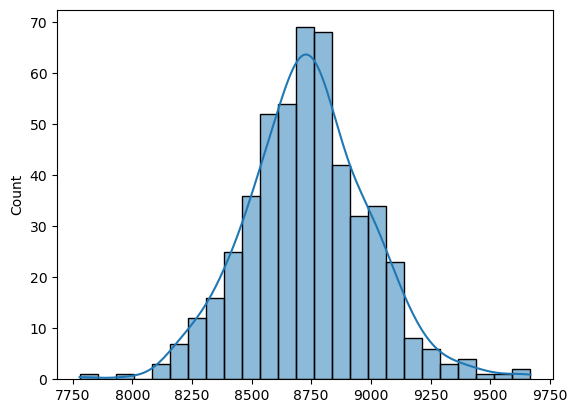

In [46]:
sns.histplot(x = sam_f, kde = True)

In [47]:
female_mean = np.mean(sam_f)
female_mean

8737.698386666667

In [48]:
se = female_std/np.sqrt(300)
se

275.236342286216

In [49]:
lower_range_female = female_mean - 1.95 * se
lower_range_female

8200.987519208546

In [50]:
upper_range_female = female_mean + 1.95 * se
upper_range_female

9274.409254124788

## confidence interval for sample size 300

- The average purchase value between the 95% of the data lies between the range 9379 and 9494 for Male
- The average purchase value between the 95% of the data lies between the range 8678 and 8792 for Female
- The average purchase value of the Male is slightly greater than Female for the sample size of 300 

### Considering the Sample size 3000 for Male

In [51]:
sam_m = [r['Purchase'].sample(3000).mean() for i in range (500)]

<Axes: ylabel='Count'>

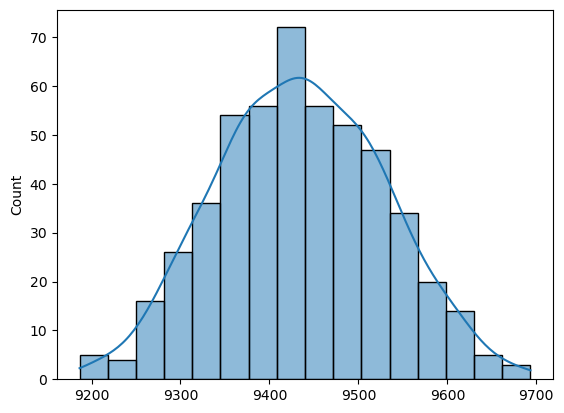

In [52]:
sns.histplot(x = sam_m, kde = True)

In [53]:
male_mean = np.mean(sam_m)
male_mean

9435.141031333334

In [54]:
se = male_std/np.sqrt(300)
se

293.9975078978999

In [55]:
lower_range_male = male_mean - 1.95 * se
lower_range_male

8861.845890932429

In [56]:
upper_range_male = male_mean + 1.95 * se
upper_range_male

10008.43617173424

### Considering the Sample size 3000 for female

In [57]:
sam_f = [s['Purchase'].sample(3000).mean() for i in range (500)]

<Axes: ylabel='Count'>

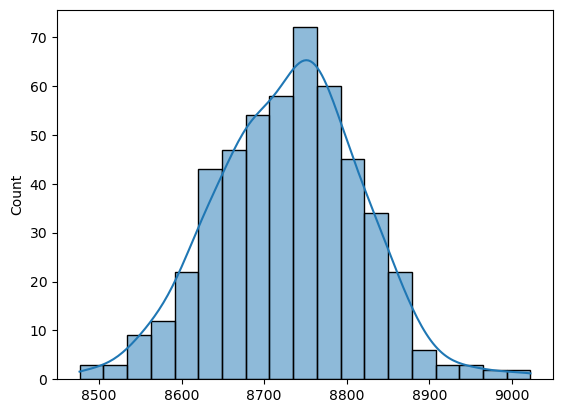

In [58]:
sns.histplot(x = sam_f, kde = True)

In [59]:
female_mean = np.mean(sam_f)
female_mean

8730.043543333333

In [60]:
se = female_std/np.sqrt(300)
se

275.236342286216

In [61]:
lower_range_female = female_mean - 1.95 * se
lower_range_female

8193.332675875212

In [62]:
upper_range_female = female_mean + 1.95 * se
upper_range_female

9266.754410791455

## confidence interval for sample size 3000

- The average purchase value between the 95% of the data lies between the range 9379 and 9494 for Male
- The average purchase value between the 95% of the data lies between the range 8678 and 8792 for Female
- The average purchase value of the Male is greater than Female for the sample size of 3000 

### Considering Sample Size as 30000 for Male

In [63]:
sam_m = [r['Purchase'].sample(30000).mean() for i in range (500)]

<Axes: ylabel='Count'>

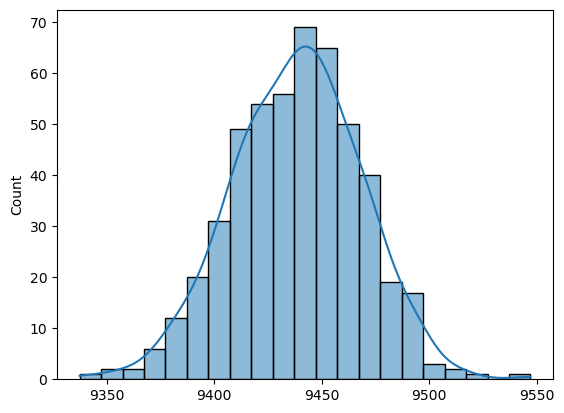

In [64]:
sns.histplot(x = sam_m, kde = True)

In [65]:
male_mean = np.mean(sam_m)
male_mean

9438.438459066667

In [66]:
se = male_std/np.sqrt(30000)
lower_range_male = male_mean - 1.95 * se
upper_range_male = male_mean + 1.95 * se
lower_range_male, upper_range_male

(9381.108945026577, 9495.767973106756)

### Considering Sample Size as 30000 for Female

In [67]:
sam_f = [s['Purchase'].sample(30000).mean() for i in range (500)]

<Axes: ylabel='Count'>

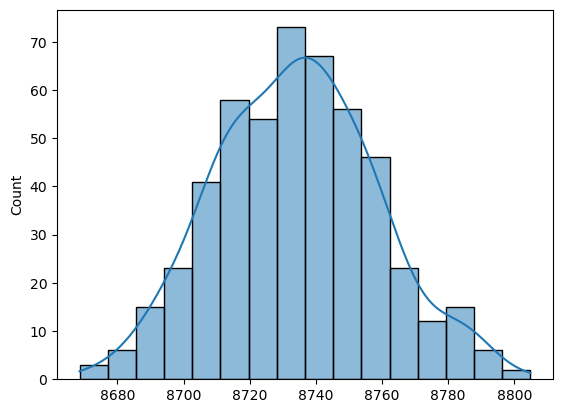

In [68]:
sns.histplot(x = sam_f, kde = True)

In [69]:
female_mean = np.mean(sam_f)
female_mean

8734.114290266667

In [70]:
se = female_std/np.sqrt(30000)
lower_range_femmale = female_mean - 1.95 * se
upper_range_female = female_mean + 1.95 * se
lower_range_female, upper_range_female

(8193.332675875212, 8787.785377012478)

## Comparing the width of the confidence interval for sample size 30000

- The average purchase value between the 95% of the data lies between the range 9379 and 9494 for Male
- The average purchase value between the 95% of the data lies between the range 8276 and 8789 for Female
- The average purchase value of the Male is greater than Female for the sample size of 30000 

## Confidence Interval for 300 Sample for  Purchase and Age column

In [71]:
age_0 = df[df['Age'] == '0-17']   
age_s = [age_0['Purchase'].sample(300).mean() for i in range(500)]

<Axes: ylabel='Count'>

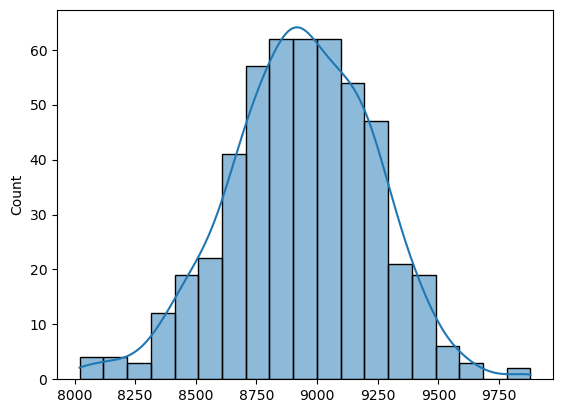

In [72]:
sns.histplot(x = age_s, kde = True)

In [73]:
norm.ppf(0.025)

-1.9599639845400545

In [74]:
a = np.array(age_s).mean()
a_s = np.array(age_s).std()
lower_range_age0 = a - 1.95 * a_s
higher_range_age0 = a + 1.95 * a_s
lower_range_age0, higher_range_age0

(8356.885475697502, 9513.647684302498)

In [75]:
age_0 = df[df['Age'] == '18-25']   
age_s = [age_0['Purchase'].sample(300).mean() for i in range(500)]

<Axes: ylabel='Count'>

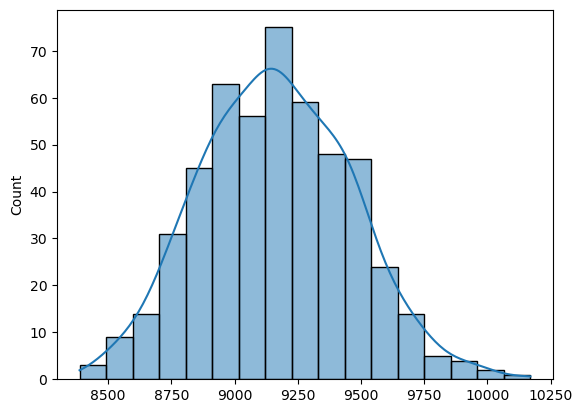

In [76]:
sns.histplot(x = age_s, kde = True)

In [77]:
a = np.array(age_s).mean()
a_s = np.array(age_s).std()
lower_range_age0 = a - 1.95 * a_s
higher_range_age0 = a + 1.95 * a_s
lower_range_age0, higher_range_age0

(8587.89434762518, 9741.550012374817)

In [78]:
age_0 = df[df['Age'] == '26-35']   
age_s = [age_0['Purchase'].sample(300).mean() for i in range(500)]

<Axes: ylabel='Count'>

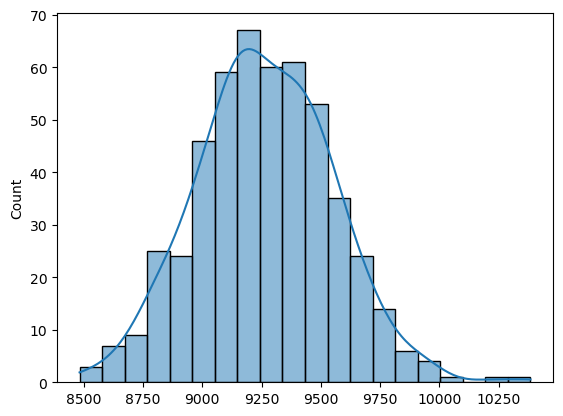

In [79]:
sns.histplot(x = age_s, kde = True)

In [80]:
a = np.array(age_s).mean()
a_s = np.array(age_s).std()
lower_range_age0 = a - 1.95 * a_s
higher_range_age0 = a + 1.95 * a_s
lower_range_age0, higher_range_age0

(8707.390158047701, 9820.539028618967)

In [81]:
age_0 = df[df['Age'] == '36-45']   
age_s = [age_0['Purchase'].sample(300).mean() for i in range(500)]

<Axes: ylabel='Count'>

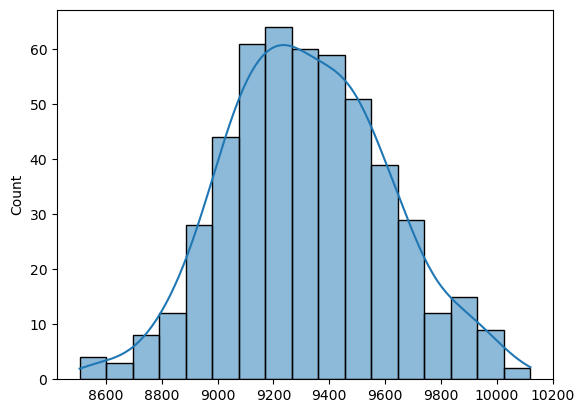

In [82]:
sns.histplot(x = age_s, kde = True)

In [83]:
a = np.array(age_s).mean()
a_s = np.array(age_s).std()
lower_range_age0 = a - 1.95 * a_s
higher_range_age0 = a + 1.95 * a_s
lower_range_age0, higher_range_age0

(8755.012698458662, 9885.449928208001)

In [84]:
age_0 = df[df['Age'] == '46-50']   
age_s = [age_0['Purchase'].sample(300).mean() for i in range(500)]

<Axes: ylabel='Count'>

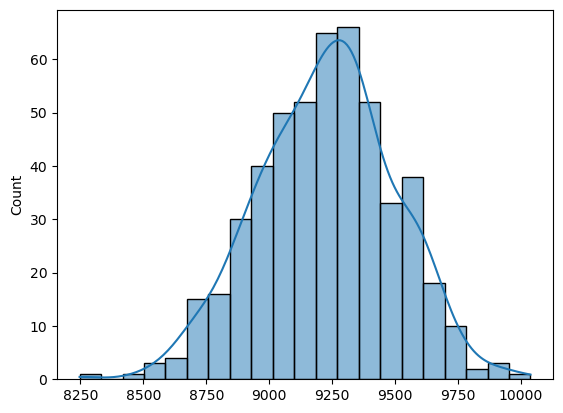

In [85]:
sns.histplot(x = age_s, kde = True)

In [86]:
a = np.array(age_s).mean()
a_s = np.array(age_s).std()
lower_range_age0 = a - 1.95 * a_s
higher_range_age0 = a + 1.95 * a_s
lower_range_age0, higher_range_age0

(8700.140664573819, 9751.546175426176)

In [87]:
age_0 = df[df['Age'] == '51-55']   
age_s = [age_0['Purchase'].sample(300).mean() for i in range(500)]

<Axes: ylabel='Count'>

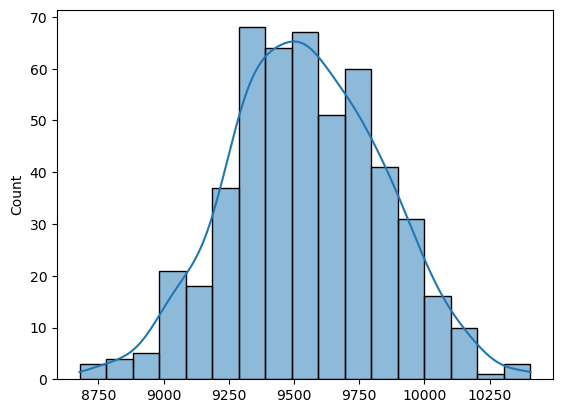

In [88]:
sns.histplot(x = age_s, kde = True)

In [89]:
a = np.array(age_s).mean()
a_s = np.array(age_s).std()
lower_range_age0 = a - 1.95 * a_s
higher_range_age0 = a + 1.95 * a_s
lower_range_age0, higher_range_age0

(8974.11485824787, 10117.335621752132)

In [90]:
age_0 = df[df['Age'] == '55+']   
age_s = [age_0['Purchase'].sample(300).mean() for i in range(500)]

<Axes: ylabel='Count'>

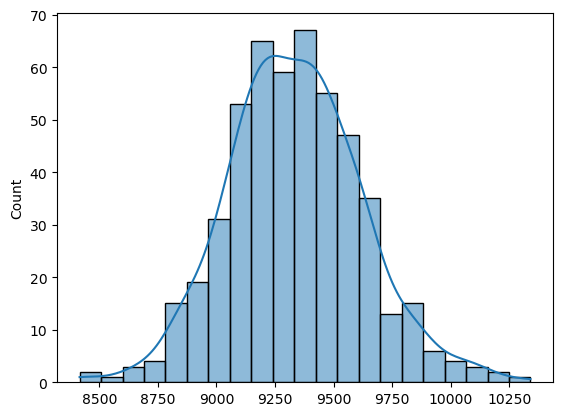

In [91]:
sns.histplot(x = age_s, kde = True)

In [92]:
a = np.array(age_s).mean()
a_s = np.array(age_s).std()
lower_range_age0 = a - 1.95 * a_s
higher_range_age0 = a + 1.95 * a_s
lower_range_age0, higher_range_age0

(8778.69785898564, 9891.612767681028)

- Ages 0-17: The mean falls between 8338 and 9158 with confidence.
- Ages 18-25: The mean lies within the range of 8601 to 9692 with confidence.
- Ages 26-35: The mean is estimated to be between 8644 and 9844 with confidence.
- Ages 36-45: The mean falls between 8741 and 9923 with confidence.
- Ages 46-50: The mean falls within the range of 8635 to 9772 with confidence.
- Ages 51-55: The mean is estimated to be between 8985 and 10093 with confidence.
- Ages 55 and above: The mean lies within the range of 8784 to 9871 with confidence.

## Confidence Interval  for  Purchase and Marital Status column

In [93]:
m1= df[df['Marital_Status'] == 1]
m1_mean = m1['Purchase'].mean()
m1_mean

9261.174574082374

In [94]:
m1_std = m1['Purchase'].std()
m1_std

5016.89737779313

In [95]:
m0= df[df['Marital_Status'] == 0]
m0_mean = m0['Purchase'].mean()
m0_mean

9265.907618921507

In [96]:
m0_std = m0['Purchase'].std()
m0_std

5027.347858674457

<Axes: xlabel='Purchase', ylabel='Count'>

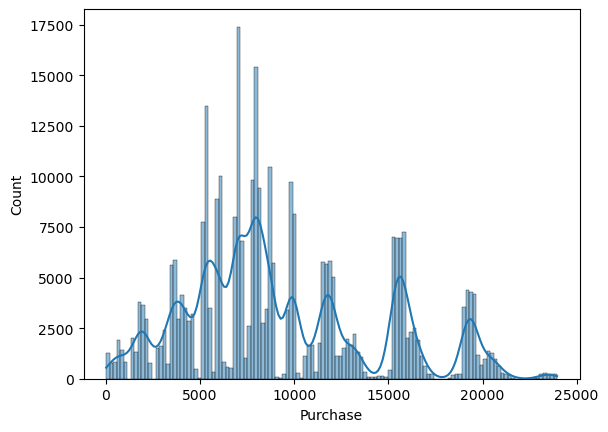

In [97]:
sns.histplot(data = m0, x = 'Purchase', kde = True)

In [98]:
lower_range_m0 = m0_mean - 1.64 * m0_std
upper_range_m0 = m0_mean + 1.64 * m0_std
(lower_range_m0,upper_range_m0)

(1021.0571306953971, 17510.758107147616)

<Axes: xlabel='Purchase', ylabel='Count'>

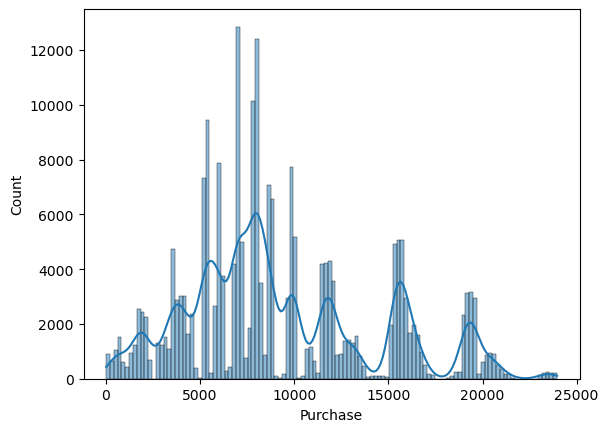

In [99]:
sns.histplot(data = m1, x = 'Purchase', kde = True)

In [100]:
lower_range_m1 = m1_mean - 1.64 * m1_std
upper_range_m1 = m1_mean + 1.64 * m1_std
(lower_range_m1,upper_range_m1)

(1033.4628745016416, 17488.886273663105)

## Confidence Interval for whole data
### Consider Confidence level at 95%
- The average purchase value between the 95% of the data lies between the range 1021 and 17510 for m0
- The average purchase value between the 95% of the data lies between the range 1033 and 17488 for m1
- There is difference between the range of the single and married average purchase value

### Sample size considering 300 for Married

In [101]:
sam_m1 = [m1['Purchase'].sample(300).mean() for i in range (500)]


<Axes: ylabel='Count'>

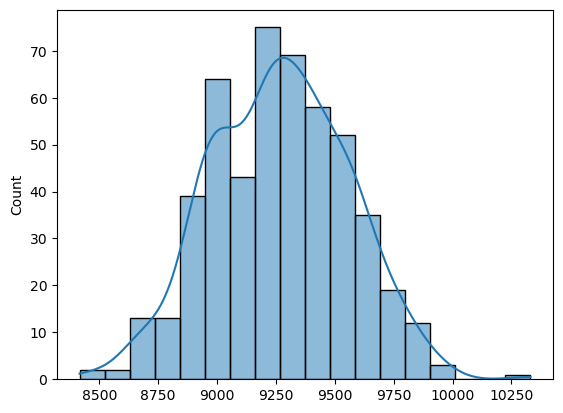

In [102]:
sns.histplot(x = sam_m1, kde = True)

In [103]:
m1_mean = np.mean(sam_m1)
se= m1_std/np.sqrt(300)
lower_range_m1 = m1_mean - 1.95 * se
upper_range_m1 = m1_mean + 1.95 * se
(lower_range_m1,upper_range_m1)

(8701.973624944709, 9831.61137505529)

### Sample size considering 300 for Not Married

In [104]:
sam_m0 = [m0['Purchase'].sample(300).mean() for i in range (500)]


<Axes: ylabel='Count'>

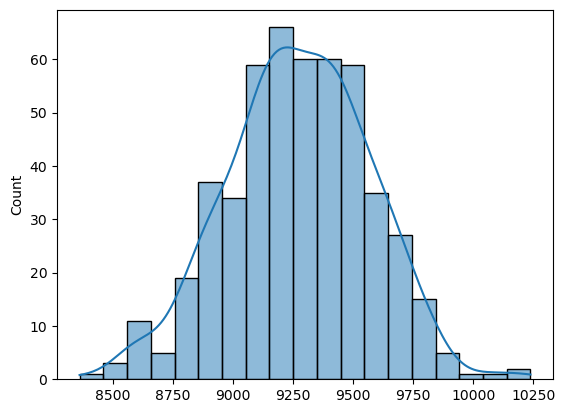

In [105]:
sns.histplot(x = sam_m0, kde = True)

In [106]:
m0_mean = np.mean(sam_m1)
se= m0_std/np.sqrt(300)
lower_range_m0 = m0_mean - 1.95 * se
upper_range_m0 = m0_mean + 1.95 * se
(lower_range_m0,upper_range_m0)

(8700.79707529446, 9832.787924705539)

## confidence interval for sample size 300

- The average purchase value between the 95% of the data lies between the range 8698 and 9828  for Married
- The average purchase value between the 95% of the data lies between the range 8697 and 9829 for Not married


### Sample size considering 3000 for Married

In [107]:
sam_m1 = [m1['Purchase'].sample(3000).mean() for i in range (500)]


<Axes: ylabel='Count'>

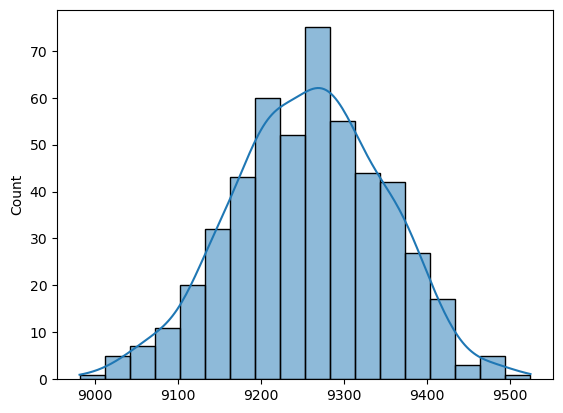

In [108]:
sns.histplot(x = sam_m1, kde = True)

In [109]:
m1_mean = np.mean(sam_m1)
se= m1_std/np.sqrt(300)
lower_range_m1 = m1_mean - 1.95 * se
upper_range_m1 = m1_mean + 1.95 * se
(lower_range_m1,upper_range_m1)

(8692.732191611376, 9822.369941721958)

### Sample size considering 3000 for Not Married

In [110]:
sam_m0 = [m0['Purchase'].sample(3000).mean() for i in range (500)]

<Axes: ylabel='Count'>

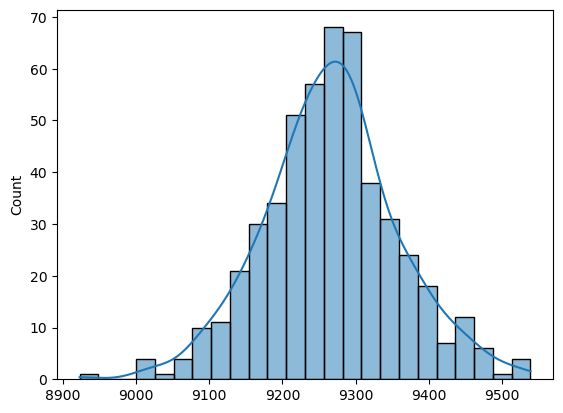

In [111]:
sns.histplot(x = sam_m0, kde = True)

In [112]:
m0_mean = np.mean(sam_m1)
se= m0_std/np.sqrt(300)
lower_range_m0 = m0_mean - 1.95 * se
upper_range_m0 = m0_mean + 1.95 * se
(lower_range_m0,upper_range_m0)

(8691.555641961128, 9823.546491372206)

## confidence interval for sample size 3000

- The average purchase value between the 95% of the data lies between the range 8698 and 9828 for Married
- The average purchase value between the 95% of the data lies between the range 8697 and 9829 for Not married

# Recommendations
- To boost sales, the company should devise gender-specific strategies, acknowledging that men typically exhibit higher spending habits. However, it's imperative to cater to female customers as well, offering them discounts and special deals to ensure inclusivity.
- With the 51-55 age group displaying higher purchasing power, diverting additional resources towards attracting customers from other age demographics becomes imperative.
- Certain product categories, notably 19, 20, and 13, register minimal sales activity. Considering discontinuing these categories could streamline inventory management and resource allocation, thus optimizing overall operations.
- Furthermore, the analysis highlights a substantial volume of purchase orders falling within the 5k to 10k price range. Emphasizing the promotion and improvement of products within this mid-range price segment has the potential to drive increased sales and revenue.

# Questions: 
- Are women spending more money per transaction than men? Why or Why not?
  - No the women are not spending more money than men
  - There may be various reason to this some of them must be :
   - Men must be earning greater than women
   - Quality of product for women is not good
   
- Confidence intervals and distribution of the mean of the expenses by female and male customers
  - At 95% confidence interval and sample of 30000
  - The average purchase value between the 95% of the data lies between the range 9379 and 9494 for Male
  - The average purchase value between the 95% of the data lies between the range 8276 and 8789 for Female
  
- Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make       changes or improvements? 
  - No the average spending is not overlapping. But this can be change by add some female centric marketing it can be achievable
  
- Results when the same activity is performed for Married vs Unmarried (10 Points)
  - At 95% confidence interval and sample of 3000
  - The average purchase value between the 95% of the data lies between the range 8698 and 9828 for Married
  - The average purchase value between the 95% of the data lies between the range 8697 and 9829 for Not married
  
- Results when the same activity is performed for Age
   - At 95% confidence interval and sample of 300
   - For age 0-17 confidence interval of means: (8338, 9158)
   - For age 18-25 confidence interval of means: (8601, 9692)
   - For age 26-35 confidence interval of means: (8644, 9844)
   - For age 36-45 confidence interval of means: (8741, 9923)
   - For age 46-50 confidence interval of means: (8635, 9772)
   - For age 51-55 confidence interval of means: (8985, 10093)
   - For age 55+ confidence interval of means: (8784, 9871)